* **Goal**: - Predict the Discount_Price for mobiles based on product features. Help business teams optimize pricing and discounts by understanding                  which features influence discounting.

*  **Factors affecting Discount**:

     - Brand & Platform
     - MRP & Selling Price
     - Technical specifications (RAM, ROM, Processor, Battery, Cameras, Display Size)
     - Customer engagement (Ratings, Review_Count, Rating_Count)


* **Skill**: EDA & Predictive Modeling

## Ml Model Prediction :
* EDA will follow two concepts,

    * Stats
      * Descriptive
    * Visual Analysis
* Model will follow three concepts,
    * Model Selection
      * Selecting X,y
      * Future Engineering
    * Model Training
    * Best Model Selection
      * Model Deployment

### TOC <a id='menu'>

* [0. Data](#dc)
* [1. Data Validation and Normalization](#dv)
* [2. EDA](#eda)
    * [2.1 Types of Variables/Columns](#vartype)
    * [2.2 Analysis](#ans)
        * [2.2.1 Uni-Variate Analysis](#uni)
        * [2.2.2 Bi-Variate Analysis](#bi)
* [3. Missing Values & Outliers Handling](#missout)
    * [3.1 Missing Values Identification & Handling](#miss)
    * [3.2 Outlier Identification & Handling](#out)
* [4.Modeling](#model)
    * [4.1 Selcting X & y](#selxy)
    * [4.2 Feature Engineering of X for y](#futeng)
        * [4.2.1 Feature Generation](#futgen)
        * [4.2.2 Feature Selection](#futsel)
        * [4.2.3 Feature Modification : Data Pre-Processing of X cols](#futmodi)
    * [4.3 Train-Test Splite](#tts)
    * [4.4 Model Training](#modeltrain)
    * [4.5 Trained Model Predictions](#trainedpred)
    * [4.6 Trained Model Evaluation](#trainedeval)
    * [4.7 Best model Selection](#bestselec)
    * [4.8 Hyper Prameter Tuning- if required](#hyptune)
    * [4.9 Saving Final Better Performance Model](#finalmodel)
    * [4.10 Real Time Prediction](#realpred)

### 0. Data

[Back to Menu](#menu)

In [99]:
# base libraries
import pandas as pd
import numpy as np


# To supress warnings
import warnings
warnings.filterwarnings('ignore')

- The Data is Collected from: **Through WebScraping (Flipkart and Amazon)**

In [144]:
# Data Loading
df=pd.read_csv("C://Users//DELL//Downloads//Cleaned_ecommerce_data.csv")
df

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count
0,poco,poco c75 5g,enchanted green,flipkart,10999.0,7699.0,3300.0,30.0,4,64,6.88,5160,5,50,4s gen 2 5g processor,4.3,83280,4112
1,poco,poco m6 plus,graphite black,flipkart,15999.0,10080.0,5919.0,36.0,6,128,6.79,5030,13,50,snapdragon 4 gen2 ae processor,4.2,59597,3573
2,cmf,cmf by nothing,black,flipkart,22999.0,18999.0,4000.0,17.0,8,128,6.77,5000,16,108,dimensity 7300 pro 5g processor,4.4,15881,1311
3,motorola,motorola g85 5g,viva magenta,flipkart,20999.0,15999.0,5000.0,23.0,8,128,6.67,5000,32,108,6s gen 3 processor,4.4,217987,11163
4,oppo,oppo k13 5g,prism black,flipkart,22999.0,17999.0,5000.0,21.0,8,128,6.67,7000,16,50,snapdragon 6 gen 4 processor,4.5,24615,1677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,samsung,samsung galaxy m36,orange haze,amazon,22999.0,17499.0,5500.0,24.0,6,128,6.60,5000,13,108,mediatek g85,4.4,5201,950
881,redmi,redmi note 14,ivy green,amazon,22999.0,17999.0,5000.0,22.0,8,128,6.80,5000,16,50,snapdragon 4 gen 2 ae,4.2,1209,525
882,lava,lava bold n1,stealth black,amazon,8399.0,6898.0,1501.0,18.0,4,128,6.80,4500,8,50,snapdragon 4s gen 2,4.3,3024,770
883,redmi,redmi 13 5g,starry black,amazon,19999.0,11699.0,8300.0,42.0,4,128,6.70,5000,8,50,snapdragon 4s gen 3,4.3,4203,459


                                                              Basic Checks

In [145]:
df.shape

(885, 18)

In [146]:
df.columns

Index(['Brand', 'Brand_Model', 'Color', 'Platform', 'MRP', 'Selling_Price',
       'Discount_Price', 'Discount', 'RAM', 'ROM', 'Display_Size', 'Battery',
       'Front_Cam(MP)', 'Back_Cam(MP)', 'Processor', 'Ratings', 'Rating_Count',
       'Review_Count'],
      dtype='object')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           885 non-null    object 
 1   Brand_Model     885 non-null    object 
 2   Color           885 non-null    object 
 3   Platform        885 non-null    object 
 4   MRP             885 non-null    float64
 5   Selling_Price   885 non-null    float64
 6   Discount_Price  885 non-null    float64
 7   Discount        885 non-null    float64
 8   RAM             885 non-null    int64  
 9   ROM             885 non-null    int64  
 10  Display_Size    885 non-null    float64
 11  Battery         885 non-null    int64  
 12  Front_Cam(MP)   885 non-null    int64  
 13  Back_Cam(MP)    885 non-null    int64  
 14  Processor       885 non-null    object 
 15  Ratings         885 non-null    float64
 16  Rating_Count    885 non-null    int64  
 17  Review_Count    885 non-null    int

                                                            Column Details

                Here's showing the descriptions of each column in dataset, based on typical e-commerce/mobile dataset understanding:

| Column Name         | Description                                                          |
| ------------------- | -------------------------------------------------------------------- |
| **Brand**           | Brand name of the mobile phone (e.g., Samsung, Redmi, Realme)        |
| **Brand\_Model**    | Combination of brand and model name (e.g., Samsung Galaxy M14)       |
| **Color**           | Color variant of the phone (e.g., Aqua Blue, Stardust Grey)          |
| **Platform**        | E-commerce platform where phone is sold (e.g., Flipkart, Amazon)     |
| **MRP**             | Maximum Retail Price (original price before discount)                |
| **Selling\_Price**  | Actual selling price after discount                                  |
| **Discount\_Price** | Amount reduced from MRP (`MRP - Selling_Price`)                      |
| **Discount**        | Discount percentage offered on MRP                                   |
| **RAM**             | RAM capacity of phone in GB (e.g., 6, 8)                             |
| **ROM**             | Internal storage in GB (e.g., 128, 256)                              |
| **Display\_Size**   | Screen size in inches (e.g., 6.5, 6.78)                              |
| **Battery**         | Battery capacity in mAh (e.g., 5000, 6000)                           |
| **Front\_Cam(MP)**  | Front (selfie) camera resolution in megapixels                       |
| **Back\_Cam(MP)**   | Primary (back) camera resolution in megapixels                       |
| **Processor**       | Processor name/type (e.g., Snapdragon 695, MediaTek Dimensity 6100+) |
| **Ratings**         | Average customer rating (e.g., 4.3, 4.1)                             |
| **Rating\_Count**   | Number of customers who rated the product                            |
| **Review\_Count**   | Number of written customer reviews                                   |

### 1. Data Validation <a id='dv'>

[Back to Menu](#menu)

* Checking and validating each & every column data along with data type of column
* Duplicates Rows Handling
    - Checking and droping duplicated rows to overcome data leakage

**Column Data Validation**

In [148]:
# Taking a function for col data verification

def colcheck(df, col):
    print("Column: ", col)
    print()
    print(f"Number of Unique Values in Column: {df[col].nunique()}")
    print()
    print("Unique Values in Column:")
    print(df[col].unique())
    print()
    print("Data Type of Column:", df[col].dtype)
    print()
    print("***********************************************************")
    print()

* **Applying above function to each & every column**

In [149]:
for col in df.columns:
    colcheck(df, col)

Column:  Brand

Number of Unique Values in Column: 28

Unique Values in Column:
['poco' 'cmf' 'motorola' 'oppo' 'vivo' 'samsung' 'redmi' 'apple' 'infinix'
 'tecno' 'oneplus' 'realme' 'iqoo' 'nothing' 'google' 'lava' 'alcatel'
 'honor' 'itel' 'xiaomi' 'karbonn' 'jmax' 'hmd' 'iphone' 'acer'
 'jiobharat' 'nokia' 'elfora']

Data Type of Column: object

***********************************************************

Column:  Brand_Model

Number of Unique Values in Column: 230

Unique Values in Column:
['poco c75 5g' 'poco m6 plus' 'cmf by nothing' 'motorola g85 5g'
 'oppo k13 5g' 'motorola g35 5g' 'poco f7 5g' 'motorola g45 5g'
 'vivo t4 lite' 'samsung guru music' 'samsung guru 1200'
 'samsung galaxy f16' 'redmi a5' 'motorola edge 60' 'apple iphone 16'
 'poco m7 5g' 'infinix note 50s' 'oppo k13x 5g' 'vivo t4x 5g'
 'redmi 13 5g' 'poco c71' 'poco m7 pro' 'motorola edge 50'
 'tecno spark go' 'samsung sm 310e' 'oneplus nord ce4' 'poco x7 5g'
 'realme p3x 5g' 'iqoo z10x 5g' 'samsung galaxy a35' 're

In [150]:
df = df.astype({'Brand': 'object','Brand_Model': 'object','Color': 'object','Platform': 'object','MRP': 'float64',
    'Selling_Price': 'float64','Discount_Price': 'float64','Discount': 'float64','RAM': 'int64','ROM': 'int64','Display_Size': 'float64',
    'Battery': 'int64','Front_Cam(MP)': 'int64','Back_Cam(MP)': 'int64','Processor': 'object','Ratings': 'float64','Rating_Count': 'int64',
    'Review_Count': 'int64'})

In [151]:
# Data Type Validation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           885 non-null    object 
 1   Brand_Model     885 non-null    object 
 2   Color           885 non-null    object 
 3   Platform        885 non-null    object 
 4   MRP             885 non-null    float64
 5   Selling_Price   885 non-null    float64
 6   Discount_Price  885 non-null    float64
 7   Discount        885 non-null    float64
 8   RAM             885 non-null    int64  
 9   ROM             885 non-null    int64  
 10  Display_Size    885 non-null    float64
 11  Battery         885 non-null    int64  
 12  Front_Cam(MP)   885 non-null    int64  
 13  Back_Cam(MP)    885 non-null    int64  
 14  Processor       885 non-null    object 
 15  Ratings         885 non-null    float64
 16  Rating_Count    885 non-null    int64  
 17  Review_Count    885 non-null    int

* Now the data is validated and all columns are in the correct datatype
The validated data is below

In [152]:
df.head()

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count
0,poco,poco c75 5g,enchanted green,flipkart,10999.0,7699.0,3300.0,30.0,4,64,6.88,5160,5,50,4s gen 2 5g processor,4.3,83280,4112
1,poco,poco m6 plus,graphite black,flipkart,15999.0,10080.0,5919.0,36.0,6,128,6.79,5030,13,50,snapdragon 4 gen2 ae processor,4.2,59597,3573
2,cmf,cmf by nothing,black,flipkart,22999.0,18999.0,4000.0,17.0,8,128,6.77,5000,16,108,dimensity 7300 pro 5g processor,4.4,15881,1311
3,motorola,motorola g85 5g,viva magenta,flipkart,20999.0,15999.0,5000.0,23.0,8,128,6.67,5000,32,108,6s gen 3 processor,4.4,217987,11163
4,oppo,oppo k13 5g,prism black,flipkart,22999.0,17999.0,5000.0,21.0,8,128,6.67,7000,16,50,snapdragon 6 gen 4 processor,4.5,24615,1677


In [153]:
df.tail()

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count
880,samsung,samsung galaxy m36,orange haze,amazon,22999.0,17499.0,5500.0,24.0,6,128,6.6,5000,13,108,mediatek g85,4.4,5201,950
881,redmi,redmi note 14,ivy green,amazon,22999.0,17999.0,5000.0,22.0,8,128,6.8,5000,16,50,snapdragon 4 gen 2 ae,4.2,1209,525
882,lava,lava bold n1,stealth black,amazon,8399.0,6898.0,1501.0,18.0,4,128,6.8,4500,8,50,snapdragon 4s gen 2,4.3,3024,770
883,redmi,redmi 13 5g,starry black,amazon,19999.0,11699.0,8300.0,42.0,4,128,6.7,5000,8,50,snapdragon 4s gen 3,4.3,4203,459
884,redmi,redmi a4 5g,sparkle purple,amazon,11499.0,8798.0,2701.0,23.0,4,128,6.6,5000,13,50,snapdragon 4s gen 4,4.0,2015,1039


In [154]:
# Validating Col Data Types
df.dtypes

Brand              object
Brand_Model        object
Color              object
Platform           object
MRP               float64
Selling_Price     float64
Discount_Price    float64
Discount          float64
RAM                 int64
ROM                 int64
Display_Size      float64
Battery             int64
Front_Cam(MP)       int64
Back_Cam(MP)        int64
Processor          object
Ratings           float64
Rating_Count        int64
Review_Count        int64
dtype: object

**Duplicated rows**

In [155]:
# Converting Text Cols to lower case as python is case sensitive
for col in df.columns:
    if df[col].dtype==object:
        df[col] = df[col].str.lower()

In [156]:
# Duplicated Rows Check
df[df.duplicated()]

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count


#### Checking some checks om my data if there are present negative values
* Positive Discounts
*  Prices checking

In [157]:
df[df['Discount_Price'] >= 0]  # Keep only positive discounts

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count
0,poco,poco c75 5g,enchanted green,flipkart,10999.0,7699.0,3300.0,30.0,4,64,6.88,5160,5,50,4s gen 2 5g processor,4.3,83280,4112
1,poco,poco m6 plus,graphite black,flipkart,15999.0,10080.0,5919.0,36.0,6,128,6.79,5030,13,50,snapdragon 4 gen2 ae processor,4.2,59597,3573
2,cmf,cmf by nothing,black,flipkart,22999.0,18999.0,4000.0,17.0,8,128,6.77,5000,16,108,dimensity 7300 pro 5g processor,4.4,15881,1311
3,motorola,motorola g85 5g,viva magenta,flipkart,20999.0,15999.0,5000.0,23.0,8,128,6.67,5000,32,108,6s gen 3 processor,4.4,217987,11163
4,oppo,oppo k13 5g,prism black,flipkart,22999.0,17999.0,5000.0,21.0,8,128,6.67,7000,16,50,snapdragon 6 gen 4 processor,4.5,24615,1677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,samsung,samsung galaxy m36,orange haze,amazon,22999.0,17499.0,5500.0,24.0,6,128,6.60,5000,13,108,mediatek g85,4.4,5201,950
881,redmi,redmi note 14,ivy green,amazon,22999.0,17999.0,5000.0,22.0,8,128,6.80,5000,16,50,snapdragon 4 gen 2 ae,4.2,1209,525
882,lava,lava bold n1,stealth black,amazon,8399.0,6898.0,1501.0,18.0,4,128,6.80,4500,8,50,snapdragon 4s gen 2,4.3,3024,770
883,redmi,redmi 13 5g,starry black,amazon,19999.0,11699.0,8300.0,42.0,4,128,6.70,5000,8,50,snapdragon 4s gen 3,4.3,4203,459


In [158]:
# checking if there is any prices having highest value then 'MRP'
df[df['Selling_Price'] > df['MRP']]

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count


In [159]:
#  Value Range Checks (e.g., negative prices or ratings > 5)
df[(df['Selling_Price'] < 0) | (df['MRP'] < 0)]

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count


In [160]:
df[(df['Ratings'] < 0) | (df['Ratings'] > 5)]

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count


In [161]:
# Discount should roughly match the derived value: (MRP - Selling_Price) / MRP * 100
discount_mismatch = df[abs(((df['MRP'] - df['Selling_Price']) / df['MRP'] * 100).round(1) - df['Discount']) > 1.0]
print(f"Number of mismatched discount rows: {len(discount_mismatch)}")

Number of mismatched discount rows: 0


In [162]:
# It displays the first 5 rows of the mismatched discount entries
discount_mismatch[['MRP', 'Selling_Price', 'Discount']].head()

,MRP,Selling_Price,Discount


### 2.EDA (Checking Importance of the X column)
* **To get Insights/Importance on the data we can use eda techniques,**
    - **Uni-Variate Analysis (Study of single column data)**
    - **Bi-Variate Analysis (Study data between two or more columns)**
* Above techniques will use **Descriptive Stats** & **Visualizations**
    - **Descriptive Stats**
        - Stats Measures are used to understand column data
        - To start with descriptive stats , need to understand types of variables/columns in given data
    - **Visualizations**
        - Pictorial representation of data
            - Descriptive Stats Visual representation

**2.0 Pre-Requisites**

In [163]:
# Viz Libraries
! pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.figure_factory as ff

Defaulting to user installation because normal site-packages is not writeable


**2.1 Identifying Variables Types according to stats** <a id='vartype'>
   
[Back to Menu](#menu)

In [164]:
df.shape

(885, 18)

In [165]:
df.head()

,Brand,Brand_Model,Color,Platform,MRP,Selling_Price,Discount_Price,Discount,RAM,ROM,Display_Size,Battery,Front_Cam(MP),Back_Cam(MP),Processor,Ratings,Rating_Count,Review_Count
0,poco,poco c75 5g,enchanted green,flipkart,10999.0,7699.0,3300.0,30.0,4,64,6.88,5160,5,50,4s gen 2 5g processor,4.3,83280,4112
1,poco,poco m6 plus,graphite black,flipkart,15999.0,10080.0,5919.0,36.0,6,128,6.79,5030,13,50,snapdragon 4 gen2 ae processor,4.2,59597,3573
2,cmf,cmf by nothing,black,flipkart,22999.0,18999.0,4000.0,17.0,8,128,6.77,5000,16,108,dimensity 7300 pro 5g processor,4.4,15881,1311
3,motorola,motorola g85 5g,viva magenta,flipkart,20999.0,15999.0,5000.0,23.0,8,128,6.67,5000,32,108,6s gen 3 processor,4.4,217987,11163
4,oppo,oppo k13 5g,prism black,flipkart,22999.0,17999.0,5000.0,21.0,8,128,6.67,7000,16,50,snapdragon 6 gen 4 processor,4.5,24615,1677


**2.2 Analysis** <a id='ans'>

[Back to Menu](#menu)

- Descriptive Stats Univariate measures,
    - Numeric
        - Discrete
            - round(Mean), round(Median)
        - Continuous
            - - Mean, Median
    - Categorical & Boolean
        - nunique
        - unique
        - Mode
* Visualizations for Uni-Variate
    - Categorical: Comparision: Pie/Bar
    - Numerical: Distribution: Hist/Box/Density

**2.2.1 Uni Variate Analysis**<a id='#uni'>

Uni variate Stats & Visuals 

[Back to Menu](#menu)

In [166]:
# Select numeric features
features = ['MRP', 'Selling_Price', 'Discount_Price', 'Discount', 'RAM', 'ROM','Display_Size', 'Battery', 'Front_Cam(MP)', 'Back_Cam(MP)', 'Ratings',
    'Rating_Count', 'Review_Count']
# Get summary stats
stats = df[features].describe().T
stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25% (Q1)', '50% (Median)', '75% (Q3)', 'Max']
# Print in aligned format
print("Univariate Statistics:\n")
print(f"{'Feature':<20}{'Count':>8}{'Mean':>12}{'Std Dev':>12}{'Min':>8}{'Q1':>10}{'Median':>10}{'Q3':>10}{'Max':>10}")
print("-" * 100)
for col in stats.index:
    row = stats.loc[col]
    print(f"{col:<20}{row['Count']:>8.0f}{row['Mean']:>12.2f}{row['Std Dev']:>12.2f}"
          f"{row['Min']:>8.2f}{row['25% (Q1)']:>10.2f}{row['50% (Median)']:>10.2f}"
          f"{row['75% (Q3)']:>10.2f}{row['Max']:>10.2f}")

Univariate Statistics:

Feature                Count        Mean     Std Dev     Min        Q1    Median        Q3       Max
----------------------------------------------------------------------------------------------------
MRP                      885    29457.05    24781.51  999.00  13999.00  21999.00  34999.00 149999.00
Selling_Price            885    22663.60    20327.11  267.00  10049.00  16575.00  27999.00 134900.00
Discount_Price           885     6793.45     7155.75  250.00   3500.00   5000.00   7020.00  72000.00
Discount                 885       24.79       10.77    1.00     18.00     23.00     32.00     73.00
RAM                      885        7.25        2.86    2.00      4.00      8.00      8.00     16.00
ROM                      885      162.42       97.40   32.00    128.00    128.00    256.00    512.00
Display_Size             885        6.56        0.76    1.50      6.60      6.70      6.77      7.80
Battery                  885     5116.80      841.18  800.00   5000

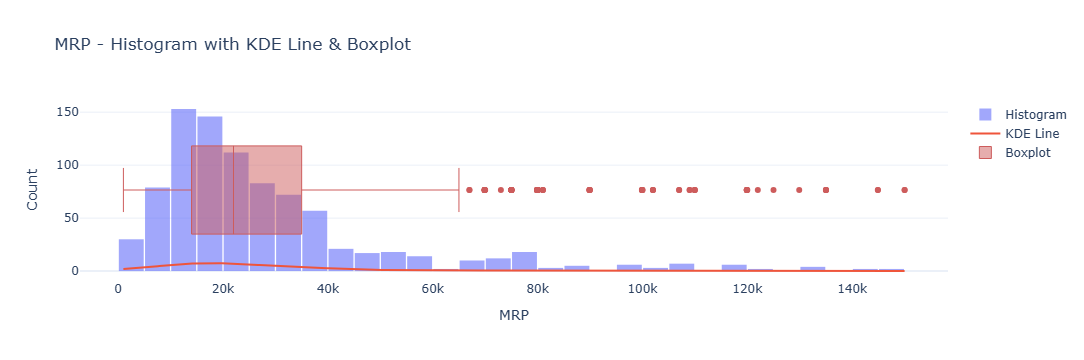

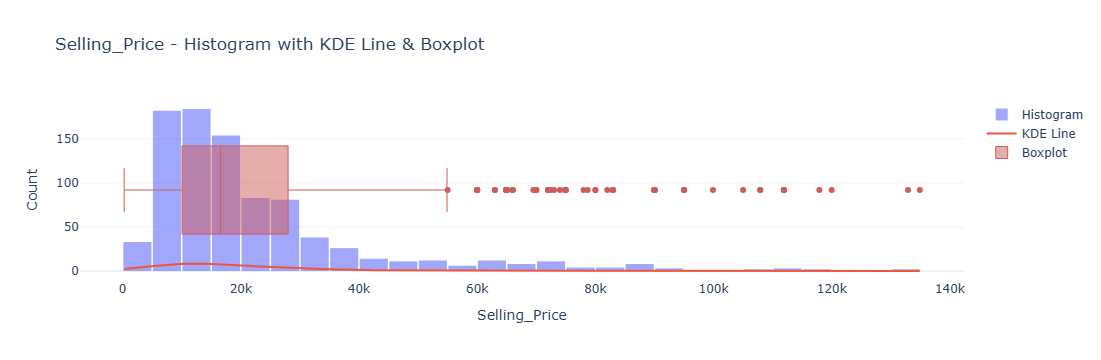

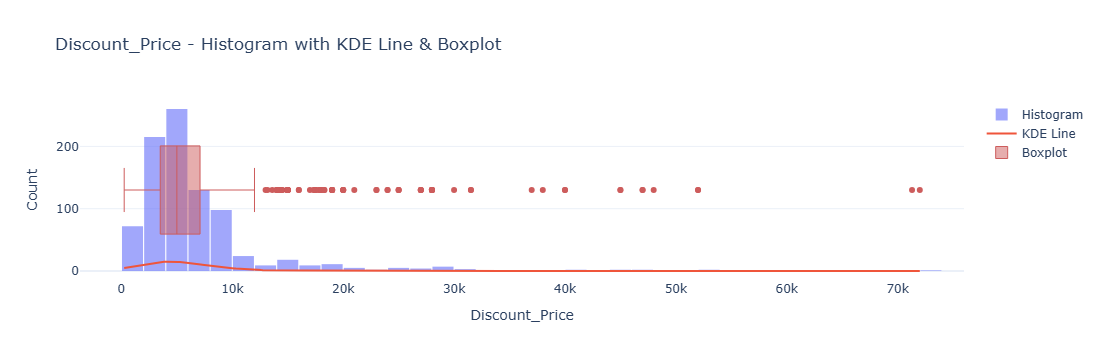

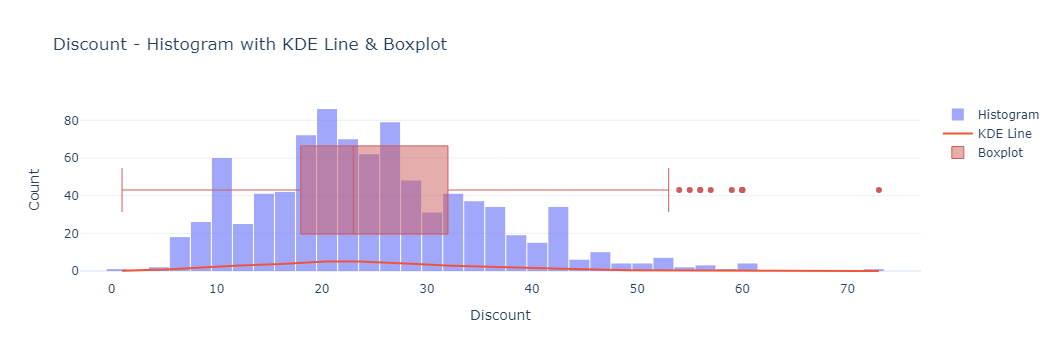

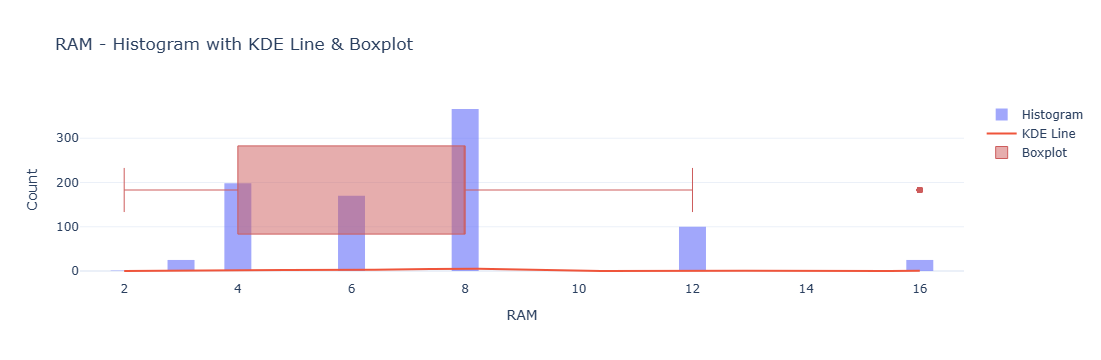

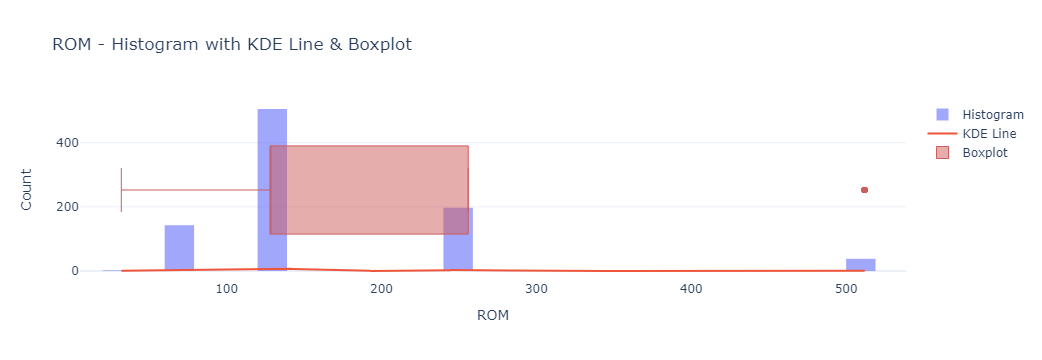

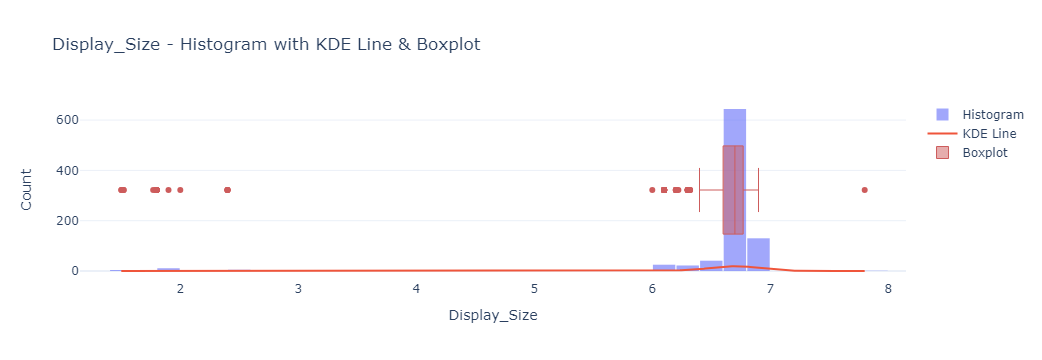

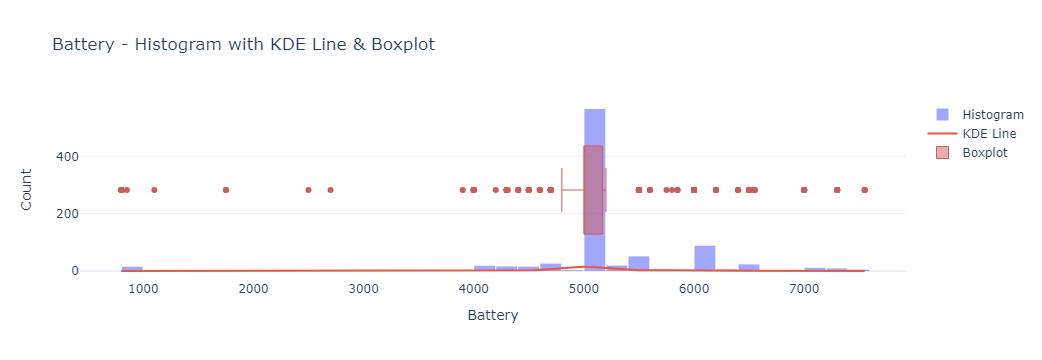

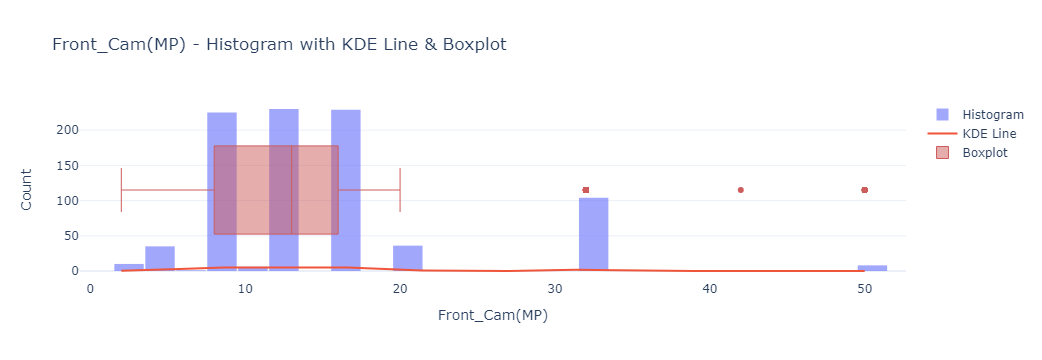

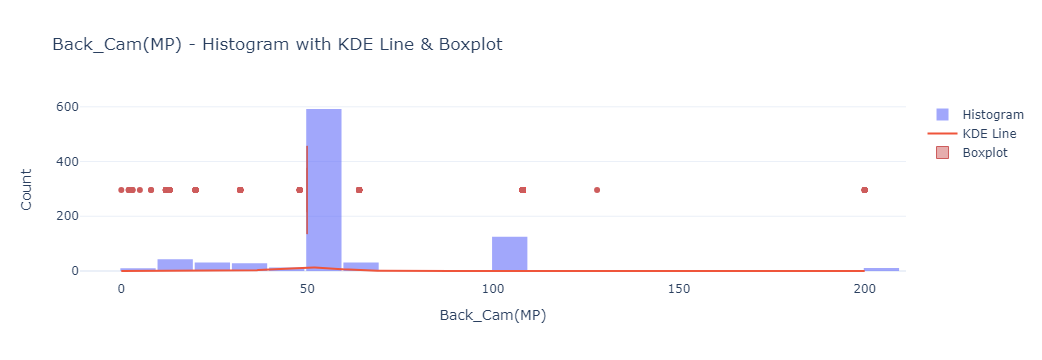

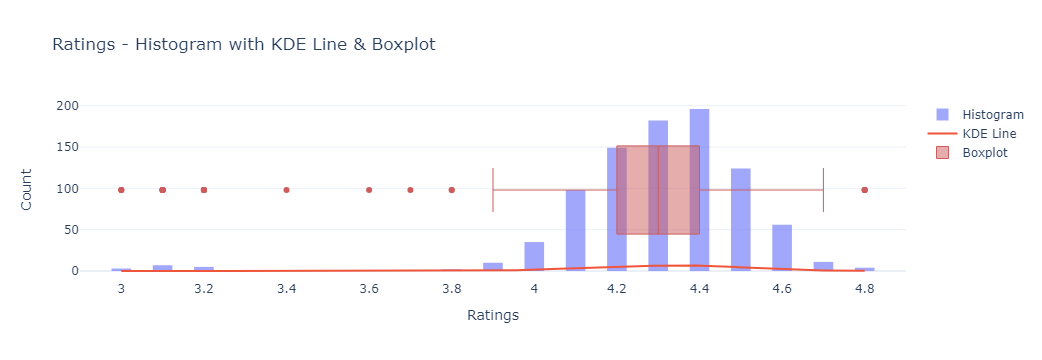

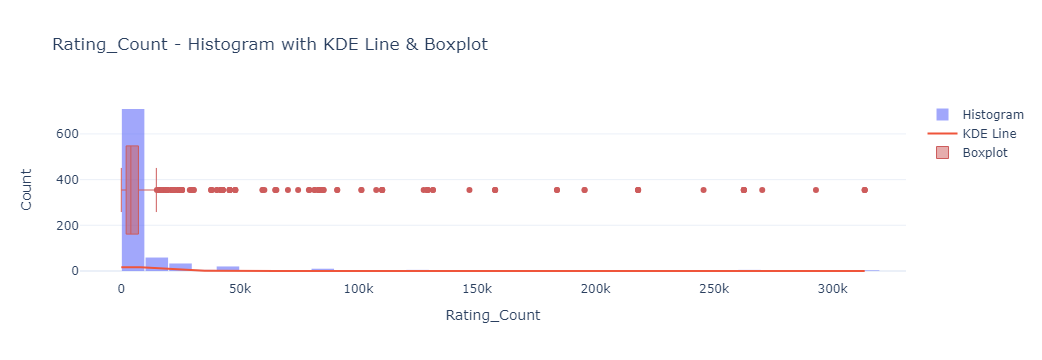

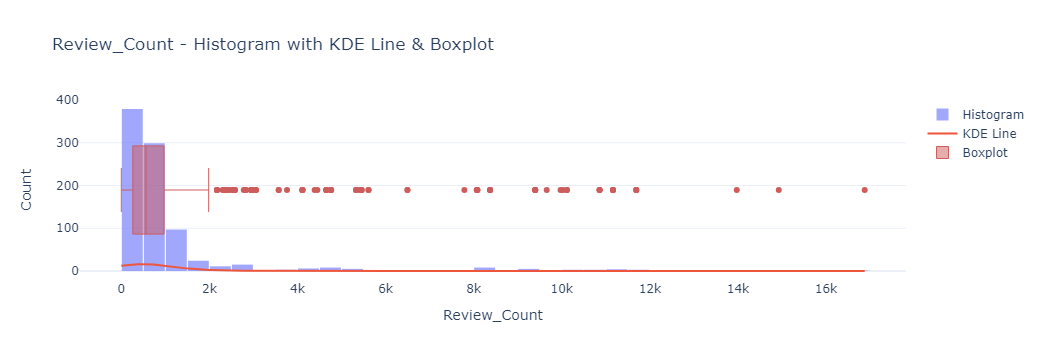

In [167]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
for col in features:
    # Drop NaNs and get data
    col_data = df[col].dropna()
    # Histogram
    hist = go.Histogram(x=col_data, nbinsx=40, name='Histogram', opacity=0.6)
    # KDE Line
    kde = gaussian_kde(col_data)
    x_vals = np.linspace(col_data.min(), col_data.max(), 500)
    y_vals = kde(x_vals)    
    # Normalize the KDE line to match histogram scale
    y_vals_scaled = y_vals * len(col_data) * (x_vals[1] - x_vals[0])
    kde_line = go.Scatter(x=x_vals, y=y_vals_scaled, mode='lines', name='KDE Line')
    # Box (side) plot
    box = go.Box(x=col_data, name='Boxplot', boxpoints='outliers', marker_color='indianred', line=dict(width=1), yaxis='y2')
    # Combine all
    fig = go.Figure(data=[hist, kde_line, box])
    # Layout with secondary y-axis for box if needed
    fig.update_layout(title=f"{col} - Histogram with KDE Line & Boxplot",xaxis_title=col,yaxis_title="Count",
                      yaxis2=dict(overlaying='y', side='right', showticklabels=False),bargap=0.05,template="plotly_white")
    fig.show()

**2.2.2 Bi-Variate Analysis**<a id='#bi'>

Bi Variate stats & Visuals

[Back to Menu](#menu)

- Descriptive Stats Measures used to study data between two or more columns

**Bi-Variate**|**Stats Measures**
----|-----------
**Numeric-Numeric...**|**Correlation (-1 to +1)**
**Numeric-Categorical...**|**Aggregation Functions (count, min, max, avg, sum)**
**Categorical-Categorical...**|**FDT (Frequency Distribution Table)**
|

       - Correlation Coeffiecient Relation Categories

                    0.75 to 1 - Strong Correlation
                    0.50 to 0.75 - Moderate Correlation
                    <0.50 - Weak Correlation
                
- Visualizations

Bi-Variate Analysis


   * **Descriptive Stats** 

In [168]:
# Overall Discount Summary
print("Average Discount %:", df['Discount'].mean())
print("Maximum Discount %:", df['Discount'].max())
# Top brands offering highest average discount
top_discount_brands = df.groupby('Brand')['Discount'].mean().sort_values(ascending=False)
print("Brands with highest average discounts:\n", top_discount_brands)

Average Discount %: 24.789830508474576
Maximum Discount %: 73.0
Brands with highest average discounts:
 Brand
elfora       73.000000
jiobharat    60.000000
jmax         57.000000
hmd          46.000000
acer         45.400000
honor        44.200000
alcatel      40.666667
xiaomi       38.300000
samsung      29.858757
nokia        29.250000
poco         28.015152
infinix      27.454545
tecno        27.000000
redmi        26.551515
google       26.000000
motorola     22.018182
itel         21.666667
oppo         21.478261
realme       21.421875
vivo         20.920000
iqoo         19.268293
cmf          18.400000
karbonn      18.000000
lava         17.378378
oneplus      15.217391
nothing      11.571429
apple         9.068966
iphone        8.875000
Name: Discount, dtype: float64


* Visual

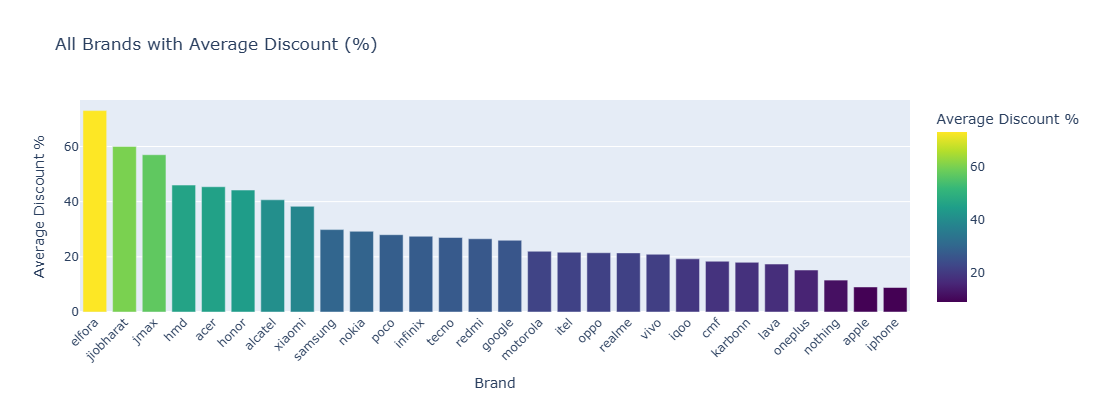

In [169]:
# Group by all brands and calculate average discount
brand_discounts = df.groupby('Brand')['Discount'].mean().sort_values(ascending=False).reset_index()
# Plot all brands with their average discount %
fig = px.bar(brand_discounts,x='Brand',y='Discount',title='All Brands with Average Discount (%)',labels={'Discount': 'Average Discount %'},color='Discount',
    color_continuous_scale='Viridis')
# Rotate x-axis labels for readability
fig.update_layout(xaxis_tickangle=-45,height=400,width=1000)  # Increase width
fig.show()

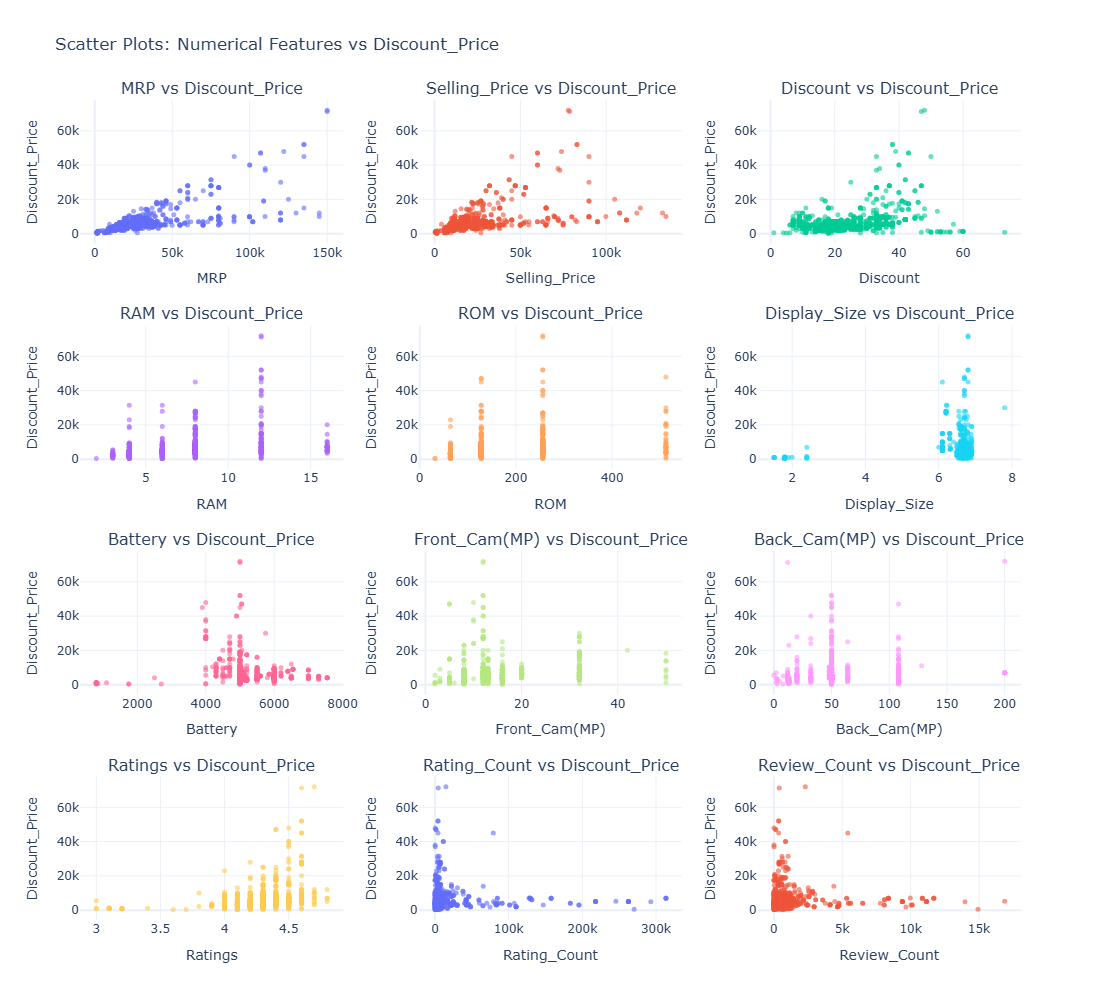

In [170]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# List of numerical columns (excluding Discount_Price)
num_cols = [col for col in df.select_dtypes(include='number').columns if col != 'Discount_Price']
# Create subplot grid (adjust as per number of columns)
rows = 4
cols = 3
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=[f"{col} vs Discount_Price" for col in num_cols],horizontal_spacing=0.08,vertical_spacing=0.1)
# Add scatter plots with axis labels
for i, col in enumerate(num_cols):
    row = i // cols + 1
    col_idx = i % cols + 1
    fig.add_trace(
        go.Scatter(
            x=df[col], 
            y=df['Discount_Price'], 
            mode='markers',
            marker=dict(size=5, opacity=0.6),
            name=col
        ),
        row=row, col=col_idx
    )
    
    # Add axis titles for each subplot
    fig.update_xaxes(title_text=col, row=row, col=col_idx)
    fig.update_yaxes(title_text='Discount_Price', row=row, col=col_idx)

# Update layout
fig.update_layout(height=1000, width=1200, title_text="Scatter Plots: Numerical Features vs Discount_Price",showlegend=False,template="plotly_white")
fig.show()

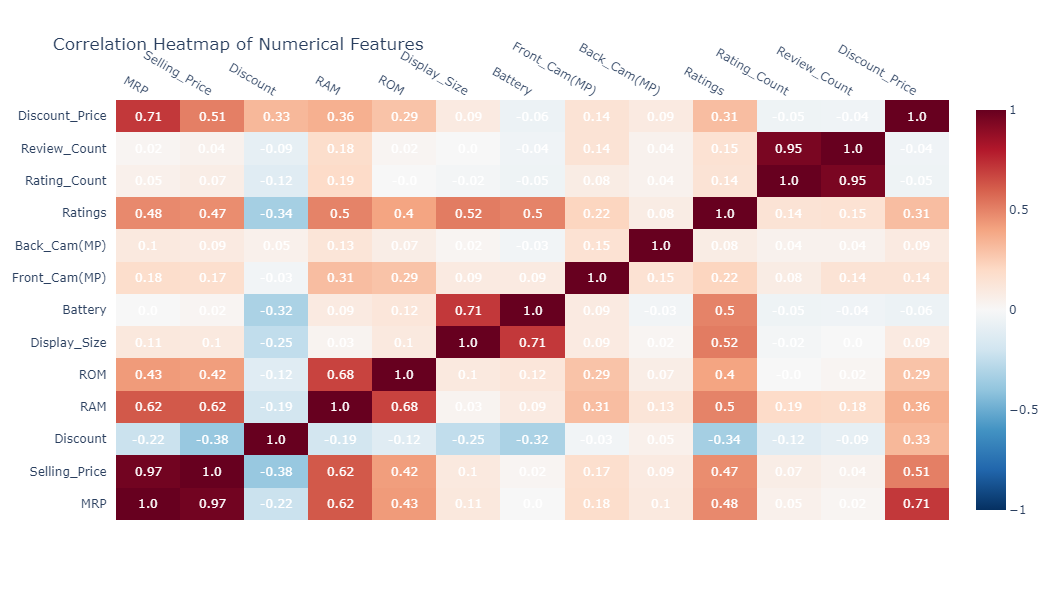

In [171]:
import plotly.figure_factory as ff
# Calculate correlation matrix
corr_matrix = df[num_cols + ['Discount_Price']].corr().round(2)
# Create heatmap
heatmap = ff.create_annotated_heatmap(z=corr_matrix.values,x=corr_matrix.columns.tolist(),y=corr_matrix.index.tolist(),colorscale='RdBu',showscale=True,
    reversescale=True,zmin=-1,zmax=1)
heatmap.update_layout(title="Correlation Heatmap of Numerical Features",width=900,height=600)
heatmap.show()

**3. Missing Values & Outliers Handling**<a id='#missout'>

[Back to Menu](#menu)

 - Checking Missing values & outlaiers Handling
 - Missing values can cause errors or bias by hiding important patterns, so we handle them by dropping or filling with suitable values.
 - Outliers are extreme values in model learning and reduce accuracy, so we either remove or transform them.

**3.1 Missing Values Identification & Handling**<a id='#miss'>

[Back to Menu](#menu)

In [172]:
# To identify and handle **missing values** in your dataset efficiently, follow this structured process:
# Check Missing Count and Percentage
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing_Values'] > 0].sort_values(by='Missing_Values', ascending=False)
missing_df

,Missing_Values,Missing_Percentage


In [173]:
# Detect Hidden Missing Values
# Sometimes values like `"NA"`, `"missing"`, `"-"` are used as placeholders.
df.replace(["NA", "na", "-", "missing", "None", ""], pd.NA, inplace=True)
#Confirm No Missing Values
df.isnull().sum().sum()  # Should return 0

0

**3.2 Outlier Identification & Handling**<a id='#out'>

[Back to Menu](#menu)

In [174]:
# Cheking important columns for any outliers in data
print("\n----- Cross-Feature Logical Outliers -----")
important_cols = ['ROM', 'RAM', 'Battery', 'MRP', 'Display_Size']
# Rules:
rules_outliers = df[
    (df['ROM'] > 1024) |                # Unrealistic high ROM (>1TB)
    (df['RAM'] > 550) |                 # Unrealistic RAM
    (df['Battery'] > 10000) |           # Battery > 10,000 mAh
    (df['Display_Size'] > 8) |          # Display > 8 inches
    (df['MRP'] > 200000)]               # Price > 2 lakh
print(rules_outliers[['Brand_Model'] + important_cols])


----- Cross-Feature Logical Outliers -----
Empty DataFrame
Columns: [Brand_Model, ROM, RAM, Battery, MRP, Display_Size]
Index: []


In [175]:
# Using IsolationForest checking the outlaiers
from sklearn.ensemble import IsolationForest
print("\n----- Isolation Forest Outliers -----")
iso_forest = IsolationForest(contamination=0.02, random_state=42)
df['iso_outlier'] = iso_forest.fit_predict(df[important_cols])

outliers = df[df['iso_outlier'] == -1]
print(outliers[['Brand_Model'] + important_cols])
# Drop helper column
df.drop(columns=['iso_outlier'], inplace=True)


----- Isolation Forest Outliers -----
            Brand_Model  ROM  RAM  Battery     MRP  Display_Size
9    samsung guru music   64    6      800  2349.0          1.80
10    samsung guru 1200  128    8      800  1699.0          1.52
34   samsung guru music  128    8      800  1999.0          1.80
42      samsung sm 310e   64    4      800  1999.0          1.90
63     samsung guru1200   64    6      800  1799.0          1.80
132   samsung guru 1200   64    4      800  1699.0          1.52
142  samsung guru music   64    4     1100  1999.0          2.00
204       motorola a200   64    4      800  1549.0          1.77
211       lava a3 torch  128    6     1750  1649.0          1.80
213        samsung 1200   64    4      800  1699.0          1.50
234  samsung guru music   64    6      800  1999.0          1.80
283  samsung guru music   64    6      800  1999.0          1.80
286  motorola a50v dual   64    4     1750  1849.0          1.80
298      samsung b310ed  128    6      850  1599.0 

In [176]:
# Remove Outliers and cheking original data and mofidified data
from sklearn.ensemble import IsolationForest

# Pick important columns to check
important_cols = ['MRP', 'ROM', 'RAM']
# Create Isolation Forest model
iso = IsolationForest(contamination=0.02, random_state=42)
# Predict outliers (-1 means outlier, 1 means normal)
df['outlier'] = iso.fit_predict(df[important_cols])
# Keep only normal rows & saving as new dataset & Copy data to avoid modifying original
data = df[df['outlier'] == 1].copy()
# Drop helper columns
data.drop(columns=['outlier'], inplace=True)
df.drop(columns=['outlier'], inplace=True)
print(f"Original rows: {len(df)}, After removing outliers: {len(data)}")

Original rows: 885, After removing outliers: 867


**4. Modeling**<a id='#model'>
  
[Back to Menu](#menu)

* Model Training
* Model Selection
  - Modeling means creating and training a mathematical model that learns patterns from data.
It’s the step where your algorithm turns input data into predictions or decisions.

**4.1 Selcting X & y**<a id='#selxy'>

Selecting X & Based on y column 

[Back to Menu](#menu)

| Column              | Use in X  | Reason                                                                                                 |
| ------------------- | ---------- | ------------------------------------------------------------------------------------------------------ |
| **Brand**           |  Yes      | Brand affects pricing. Encode as category.                                                             |
| **Brand\_Model**    |  Maybe   | Too granular, almost unique per row — can overfit.                                                     |
| **Color**           |  Yes      | Color sometimes affects price, but small effect.                                                       |
| **Platform**        |  Yes      | Flipkart/Amazon might affect price.                                                                    |
| **MRP**             |  Careful | Strong correlation with selling price — could leak if predicting price, but fine if predicting rating. |
| **Selling\_Price**  |  No       | Usually target or leaks into discount calculation.                                                     |
| **Discount\_Price** |  No       | This is basically target if predicting discounts.                                                      |
| **Discount**        |  No       | Calculated from Selling\_Price & MRP → direct leakage.                                                 |
| **RAM**             |  Yes      | Important spec.                                                                                        |
| **ROM**             |  Yes      | Important spec.                                                                                        |
| **Display\_Size**   |  Yes      | Can influence price.                                                                                   |
| **Battery**         |  Yes      | Can influence price.                                                                                   |
| **Front\_Cam(MP)**  |  Yes      | Useful feature.                                                                                        |
| **Back\_Cam(MP)**   |  Yes      | Useful feature.                                                                                        |
| **Processor**       |  Yes      | Important categorical feature.                                                                         |
| **Ratings**         |  Maybe   | Could leak if target is popularity-related.                                                            |
| **Rating\_Count**   |  Maybe   | Highly correlated with popularity and pricing.                                                         |
| **Review\_Count**   |  Maybe   | Same as above.                                                                                         |

 - Final selection removing price-related columns (Discount_Price, Discount, MRP, Selling_Price) from X to avoid data leakage, and setting y as the target (Discount_Price).

In [177]:
# Final Selection 
X = data.drop(columns=["Discount_Price","Discount",'MRP','Selling_Price'])
                        # Target column  # Price leak Columns
y = data["Discount_Price"]

**4.2 Feature Engineering of X for y**<a id='#futeng'>

Feature Engineering on X 

[Back to Menu](#menu)

**Feature engineering of X for y** means:

1. This can include cleaning data, encoding categories, scaling numbers, or creating new columns.
2. The goal is to make X more informative and relevant for predicting y without leaking its value.

**4.2.1 Feature Generation**<a id='#futgen'>

[Back to Menu](#menu)

- case (predicting Discount_Price), you don’t need to generate features that directly calculate or depend on the target (like MRP - Selling_Price, Discount%, etc.), because they will leak target info into training.

**4.2.2 Feature Selection**<a id='#futgen'>

[Back to Menu](#menu)

- Using Bivariate analysis in correlation map select the high corr columns

**4.2.3 Feature Modification : Data Pre-Processing of X cols**<a id='#furmodi'>

[Back to Menu](#menu)

In [178]:
# Cheking my data is nominal or Ordinal 
# Categorical columns
categorical_cols = ["Brand", "Brand_Model", "Color", "Platform", "Processor"]

# Check unique counts and first 10 unique values for each categorical column
cat_info = {col: {"unique_count": df[col].nunique(), 
                  "unique_values": df[col].unique()[:2].tolist()} 
            for col in categorical_cols}

cat_info

{'Brand': {'unique_count': 28, 'unique_values': ['poco', 'cmf']},
 'Brand_Model': {'unique_count': 230,
  'unique_values': ['poco c75 5g', 'poco m6 plus']},
 'Color': {'unique_count': 295,
  'unique_values': ['enchanted green', 'graphite black']},
 'Platform': {'unique_count': 2, 'unique_values': ['flipkart', 'amazon']},
 'Processor': {'unique_count': 195,
  'unique_values': ['4s gen 2 5g processor',
   'snapdragon 4 gen2 ae processor']}}

Data was nominal then going to one-hot encoding / lable encodeing /target encoding

- One-Hot Encode Brand & Platform

- Target Encode Brand_Model, Color, Processor

- Keep numerics as is for one version, and scale them for another

**4.3 Train-Test Splite**<a id='#tts'>

[Back to Menu](#menu)

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
# Split data first to prevent leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Now doing the encoding

In [181]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify column types
platform_brand_cols = ['Platform', 'Brand']  # For one-hot encoding
remaining_cat_cols = X.select_dtypes(include=['object', 'category']).columns.drop(platform_brand_cols)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    # One-hot encode Platform and Brand
    ('onehot', OneHotEncoder(handle_unknown='ignore'), platform_brand_cols),
    
    # Target encode remaining categorical columns
    ('target', TargetEncoder(target_type='continuous'), remaining_cat_cols),
    
    # Scale numerical columns
    ('scaler', StandardScaler(), num_cols)
])

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train, y_train)
X_test_processed = preprocessor.transform(X_test)  # Important: only transform, not fit

# Convert back to DataFrame for inspection (optional)
feature_names = (
    list(preprocessor.named_transformers_['onehot'].get_feature_names_out(platform_brand_cols)) + 
    list(remaining_cat_cols) + 
    list(num_cols))
    
x_train = pd.DataFrame(X_train_processed, columns=feature_names)
x_test = pd.DataFrame(X_test_processed, columns=feature_names)

print("Processed training data shape:", x_train.shape)
print("Processed test data shape:", x_test.shape)

Processed training data shape: (693, 41)
Processed test data shape: (174, 41)


**4.4 Model Training**<a id='#modeltrain'>

[Back to Menu](#menu)

Model training means teaching a machine learning algorithm to find patterns in your data that map input features (X_train) to the target (y_train). The goal is to build a model that can predict the target variable on new, unseen data accurately.

| Algorithm Type | Examples                                                     | Use Case                                   |
| -------------- | ------------------------------------------------------------ | ------------------------------------------ |
| Linear         | Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, Logistic Regression, Linear Discriminant Analysis (LDA), Perceptron         | Simple relationships, interpretable models |
| Non-Linear     | Decision Trees, Random Forest, Gradient Boosting Machines (GBM), XGBoost / LightGBM / CatBoost, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Naive Bayes | Complex relationships, higher accuracy     |

* Some algorithms require scaling (e.g., Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, Logistic Regression, Linear Discriminant Analysis (LDA),Perceptron,Support Vector Machines (SVM),K-Nearest Neighbors (KNN)).
* Some don’t need scaling because they’re tree-based (e.g., Decision Trees, Random Forest, Gradient Boosting Machines (GBM), XGBoost, LightGBM, CatBoost, Naive Bayes).

In [184]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
# Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#Tree-based Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# XGBoost
from xgboost import XGBRegressor
# Support Vector Regression
from sklearn.svm import SVR


# Define models (with tuned hyperparameters)
models = {
    # Linear Models
    'Linear Regression': LinearRegression(),
    'Ridge (L2)': Ridge(alpha=10),
    'Lasso (L1)': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5),
    
    # Non-Linear Models
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=8, min_samples_leaf=20,max_features=0.5,random_state=42),
    'XGBoost': XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'SVR': SVR(C=10, kernel='rbf')
}

# Evaluate all models
results = []
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)
    
    # Calculate metrics
    metrics = {
        'Model': name,
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    
    # Determine fit status
    if metrics['Test R²'] > metrics['Train R²'] + 0.1:
        metrics['Fit Status'] = "Underfit"
    elif metrics['Train R²'] > metrics['Test R²'] + 0.15:
        metrics['Fit Status'] = "Overfit"
    else:
        metrics['Fit Status'] = "Good fit"
    
    results.append(metrics)

# Create comparison DataFrame
results_df = pd.DataFrame(results)

# Formatting
metrics_order = [
    'Model', 'Train R²', 'Test R²', 
    'Train MSE', 'Test MSE', 
    'Train RMSE', 'Test RMSE',
    'Fit Status'
]

results_df = results_df[metrics_order].sort_values('Test RMSE')

# Round numeric columns
numeric_cols = results_df.select_dtypes(include=[np.number]).columns
results_df[numeric_cols] = results_df[numeric_cols].round(3)

# Display
print("\nModel Performance Comparison:")
display(results_df.reset_index(drop=True))


Model Performance Comparison:


,Model,Train R²,Test R²,Train MSE,Test MSE,Train RMSE,Test RMSE,Fit Status
0,Ridge (L2),0.737,0.593,1.249399e+07,2.242996e+07,3534.684,4736.028,Good fit
1,ElasticNet,0.740,0.584,1.234891e+07,2.294787e+07,3514.102,4790.394,Overfit
2,Linear Regression,0.740,0.581,1.234409e+07,2.307842e+07,3513.416,4804.001,Overfit
3,Lasso (L1),0.740,0.580,1.234409e+07,2.312745e+07,3513.416,4809.101,Overfit
4,XGBoost,0.993,0.577,3.225588e+05,2.329058e+07,567.943,4826.032,Overfit
5,Gradient Boosting,0.999,0.531,6.542587e+04,2.582835e+07,255.785,5082.160,Overfit
6,Random Forest,0.617,0.516,1.819623e+07,2.665885e+07,4265.704,5163.220,Good fit
7,SVR,-0.006,0.004,4.781702e+07,5.488536e+07,6914.986,7408.466,Good fit


**4.5 Trained Model Predictions**<a id='#trainedpred'>

[Back to Menu](#menu)

In [186]:
import pandas as pd
import numpy as np

# 1. Get predictions from your best model (example: XGBoost)
best_model = models['Random Forest']  # Replace with your actual best model
predictions = best_model.predict(X_test_processed)

# 2. Create comprehensive results DataFrame
results = pd.DataFrame({
    'Model': 'Random Forest',  # Explicit model name
    'Actual': y_test.values,
    'Predicted': np.round(predictions, 2),
    'Difference': np.round(y_test.values - predictions, 2),
    'Abs_Percentage_Error': np.round((abs(y_test.values - predictions) / y_test.values) * 100, 2)
})

# 3. Add prediction statistics
stats = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Max Error', 'Accuracy Rate'],
    'Value': [
        np.round(results['Difference'].abs().mean(), 2),
        np.round(results['Difference'].abs().max(), 2),
        f"{np.round(100 - results['Abs_Percentage_Error'].mean(), 2)}%"
    ]
})

# 4. Display formatted output
print("╔══════════════════════════════════╗")
print("║       PREDICTION RESULTS         ║")
print("╚══════════════════════════════════╝")
print(f"Model: Random Forest (Best Fit)\n")
print("Sample Predictions:")
display(results.head(10).style.format({
    'Actual': '{:,.2f}',
    'Predicted': '{:,.2f}',
    'Difference': '{:,.2f}',
    'Abs_Percentage_Error': '{:.2f}%'
}))

print("\nPrediction Accuracy:")
display(stats.style.hide(axis='index'))

╔══════════════════════════════════╗
║       PREDICTION RESULTS         ║
╚══════════════════════════════════╝
Model: Random Forest (Best Fit)

Sample Predictions:


,Model,Actual,Predicted,Difference,Abs_Percentage_Error
0,Random Forest,"47,000.00","7,251.17","39,748.83",84.57%
1,Random Forest,"11,000.00","7,838.88","3,161.12",28.74%
2,Random Forest,"8,560.00","7,551.90","1,008.10",11.78%
3,Random Forest,"7,000.00","6,368.58",631.42,9.02%
4,Random Forest,"3,409.00","3,610.57",-201.57,5.91%
5,Random Forest,"7,000.00","6,124.37",875.63,12.51%
6,Random Forest,"1,501.00","2,612.01","-1,111.01",74.02%
7,Random Forest,"5,000.00","6,183.45","-1,183.45",23.67%
8,Random Forest,"6,032.00","7,422.58","-1,390.58",23.05%
9,Random Forest,"2,000.00","3,961.44","-1,961.44",98.07%



Prediction Accuracy:


Metric,Value
Mean Absolute Error,1826.940000
Max Error,39837.280000
Accuracy Rate,40.29%


**4.6 Trained Model Evaluation**<a id='#trainedeval'>

[Back to Menu](#menu)

In [187]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Assuming XGBoost is your best model (replace if using another)
best_model = models['Random Forest']
y_pred = best_model.predict(X_test_processed)

metrics = {
    "R² (Test)": r2_score(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred)*100,
    "Avg. Error (%)": (abs(y_test - y_pred)/y_test).mean()*100
}

pd.DataFrame.from_dict(metrics, orient='index', columns=['Value']).style.format("{:.2f}")

,Value
R² (Test),0.52
MAE,1826.94
RMSE,5163.22
MAPE,59.71
Avg. Error (%),59.71


**4.7 Best model Selection**<a id='#bestselec'>

[Back to Menu](#menu)

In [188]:
RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

**4.8 Hyper Prameter Tuning- if required**<a id='#hyptune'>

[Back to Menu](#menu)

In [189]:
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=7,              # Reduced from default to control overfitting
    min_samples_split=20,     # Require more samples to split
    max_features='sqrt',      # Use √n_features per split
    random_state=42
)

**4.9 Saving Final Better Performance Model**<a id='#finalmodel'>

[Back to Menu](#menu)

**4.10 Real Time Prediction**<a id='#realpred'>

[Back to Menu](#menu)